# K-Nearest-Neighbors

The K-Nearest-Neighbors algorithm votes for the target value a sample should take in the set of k nearest neighbors.

In [8]:
import numpy as np
from scipy.spatial import distance_matrix


class kNearestNeighbors:
    def __init__(self, train_set, num_neighbors):
        self.train_set = train_set
        self.num_neighbors = num_neighbors
        if self.num_neighbors > self.train_set.shape[0]:
            raise RuntimeError(
                "The number of neighbors cannot be bigger than the number of training examples"
            )

    def predict(self, test_set):
        # the y value is assumed to be the last feature in the test set
        number_of_features = self.train_set.shape[1] - 1
        x_train = self.train_set[:, :number_of_features]
        y_train = self.train_set[:, number_of_features]

        # the y value is assumed to be the last feature in the test set
        x_test = test_set[:, :number_of_features]
        y_test = test_set[:, number_of_features]

        # find closest neighbors via distance matrix computation
        distance_matrix_ = distance_matrix(x_test, x_train)
        # find num_neighbors closest neighbors via argsort
        closest_neighbors = np.argsort(distance_matrix_, axis=1)
        y_train_k_closest_neighbors = y_train[
            closest_neighbors[:, 0 : self.num_neighbors]
        ]

        # vote for the predicted label based on the k closest neighbors in the training set using the median
        y_pred = np.median(y_train_k_closest_neighbors, axis=1)
        return y_pred

In [9]:
# generate test and train set
loc_a = 1
loc_b = -1.0
num_samples = 100


def generate_data(inner_radius, outer_radius, target):
    random_nrs = np.random.normal(
        loc=0.0, scale=outer_radius, size=(50 * num_samples, 2)
    )
    radii = np.sqrt(np.sum(random_nrs ** 2, axis=1))
    mask_circle = np.logical_and(radii > inner_radius, radii < outer_radius)
    if np.sum(mask_circle) < num_samples:
        raise RuntimError("sample data could not be generated")
    random_nrs = random_nrs[mask_circle][:num_samples]
    return np.concatenate(
        (random_nrs, target * np.ones(shape=(num_samples, 1))), axis=1
    )


train_set = generate_data(inner_radius=0, outer_radius=2, target=0)
train_set = np.concatenate(
    (train_set, generate_data(inner_radius=3, outer_radius=4, target=1)), axis=0
)
test_set = generate_data(inner_radius=0, outer_radius=2, target=0)
test_set = np.concatenate(
    (train_set, generate_data(inner_radius=3, outer_radius=4, target=1)), axis=0
)


# simpler sets, just multivariate gaussians
# train_set=np.concatenate((np.concatenate((np.random.normal(loc=(loc_a, loc_a), scale=1, size=(num_samples,2)), np.ones(shape=(num_samples,1))), axis=1), np.concatenate((np.random.normal(loc=(loc_b, loc_b), scale=1, size=(num_samples,2)), np.zeros(shape=(num_samples,1))), axis=1)), axis=0)
# test_set=np.concatenate((np.concatenate((np.random.normal(loc=(loc_a, loc_a), scale=1, size=(num_samples,2)), np.ones(shape=(num_samples,1))), axis=1), np.concatenate((np.random.normal(loc=(loc_b, loc_b), scale=1, size=(num_samples,2)), np.zeros(shape=(num_samples,1))), axis=1)), axis=0)

# inplace shuffle
np.random.shuffle(test_set)
np.random.shuffle(train_set)

knn = kNearestNeighbors(train_set, 3)
predictions = knn.predict(test_set)

Text(0.5, 1.0, 'original labels')

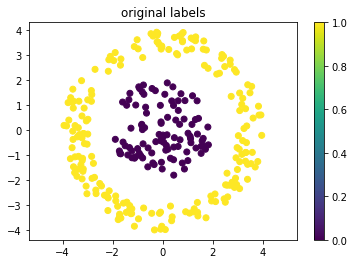

In [10]:
import matplotlib.pyplot as plt

plt.scatter(test_set[:, 0], test_set[:, 1], c=test_set[:, 2])
plt.colorbar()
plt.axis("equal")
plt.title("original labels")

Text(0.5, 1.0, 'predicted labels')

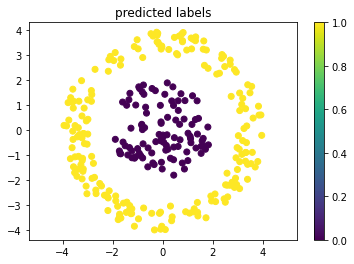

In [11]:
plt.scatter(test_set[:, 0], test_set[:, 1], c=predictions)
plt.colorbar()
plt.axis("equal")
plt.title("predicted labels")